In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_circles
from sklearn.metrics import accuracy_score

In [15]:
def initialisation(n0, n1, n2):
    W1 = np.random.randn(n1, n0)
    b1 = np.random.randn(n1, 1)
    W2 = np.random.randn(n2, n1)
    b2 = np.random.randn(n2, 1)
    parametres = {
        'W1': W1,
        'b1': b1,
        'W2': W2,
        'b2': b2
    }
    return parametres

In [3]:
def forward_propagation(X, parametres):
    W1 = parametres['W1']
    b1 = parametres['b1']
    W2 = parametres['W2']
    b2 = parametres['b2']
    
    Z1 = W1.dot(X) + b1
    A1 = 1 / (1 + np.exp(-Z1))
    Z2 = W2.dot(A1) + b2
    A2 = 1 / (1 + np.exp(-Z2))
    
    activations = {
        'A1': A1,
        'A2': A2
    }
    return activations

In [26]:
def log_loss(A, Y):
    m = Y.shape[1]
    norm = 1/m
    epsilon = 1e-15
    somme = np.sum(-Y * np.log(A + epsilon) - (1 - Y) * np.log(1-A + epsilon))
    return norm * somme

In [17]:
def back_propagation(X, Y, activations, parametres):
    A1 = activations['A1']
    A2 = activations['A2']
    W2 = parametres['W2']
    
    m = Y.shape[1]
    
    dZ2 = A2 - Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2, axis=1, keepdims = True)
    
    dZ1 = np.dot(W2.T, dZ2) * A1 * (1 - A1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1, axis=1, keepdims = True)
    
    gradients = {
        'dW1' : dW1,
        'db1' : db1,
        'dW2' : dW2,
        'db2' : db2
    }
    return gradients

In [20]:
def update(gradients, parametres, learning_rate):
    
    W1 = parametres['W1']
    b1 = parametres['b1']
    W2 = parametres['W2']
    b2 = parametres['b2']
    
    dW1 = gradients['dW1']
    db1 = gradients['db1']
    dW2 = gradients['dW2']
    db2 = gradients['db2']
    
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    
    parametres = {
        'W1' : W1,
        'b1' : b1,
        'W2' : W2,
        'b2' : b2
    }
    return parametres

In [21]:
def predict(X, parametres):
    activations = forward_propagation(X, parametres)
    A2 = activations['A2']
    return A2 >= 0.5

In [13]:
def neural_network(X_train, y_train, n1, learning_rate, n_iter):
    #n1 c'est le nombre de neurones dans notre première couche
    # initialisation parametres
    n0 = X_train.shape[0]
    n2 = y_train.shape[0]
    parametres = initialisation(n0, n1, n2)

    train_loss = []
    train_acc = []

    for i in range(n_iter):
        activations = forward_propagation(X_train, parametres)
        
        
        # mise a jour
        gradients = back_propagation(X_train, y_train, activations, parametres)
        parametres = update(gradients, parametres, learning_rate)
        
        
        if i %10 == 0:
           #faire ces calcules chaque 10 itérations
            train_loss.append(log_loss(y_train, activations['A2']))
            y_pred = predict(X_train, parametres)
            acc = accuracy_score(y_train.flatten(), y_pred.flatten())
            train_acc.append(acc)

        


    plt.figure(figsize=(14, 4))
    plt.subplot(1, 2, 1)
    plt.plot(train_loss, label='train loss')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(train_acc, label='train acc')
    plt.legend()
    plt.show()

    return (parametres)

In [28]:
def plot_decision_boundary(parametres, X, y):
    x_min, x_max = -1.5, 1.5
    y_min, y_max = -1.5, 1.5
    h = 0.01
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    grid = np.c_[xx.ravel(), yy.ravel()].T
    
    activations = forward_propagation(grid, parametres)
    probs = activations['A2'].reshape(xx.shape)
    
    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, probs, levels=[0, 0.5, 1], cmap="RdYlBu", alpha=0.6)
    plt.contour(xx, yy, probs, levels=[0.5], colors='red', linewidths=2)
    plt.scatter(X[0, :], X[1, :], c=y.flatten(), s=40, cmap='RdYlBu', edgecolors='k')
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title('Frontière de décision du réseau de neurones')
    plt.show()

dimension de X:  (2, 100)
dimension de Y:  (1, 100)


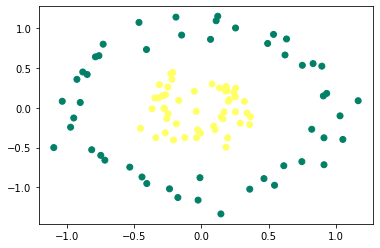

In [11]:
X, y = make_circles(n_samples = 100, noise = 0.1, factor = 0.3, random_state = 0)
X = X.T
y = y.reshape((1, y.shape[0]))

print('dimension de X: ', X.shape)
print('dimension de Y: ', y.shape)
plt.scatter(X[0, :], X[1, :], c = y, cmap='summer')
plt.show()

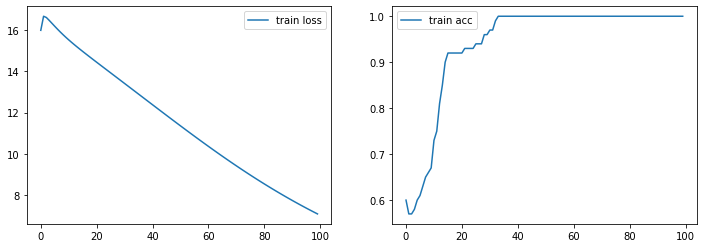

In [39]:
parametres = neural_network(X, y, n1 = 32, learning_rate = 0.1, n_iter = 1000)

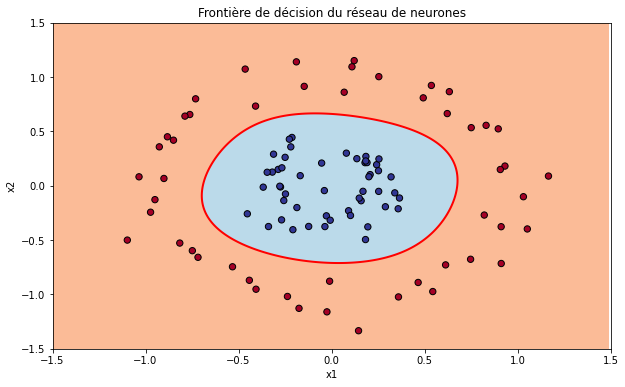

In [40]:
plot_decision_boundary(parametres, X, y)